In [ ]:
#Name -Pushpak Atey
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("D:/Pace/Intro to data science/Bank_Marketing.csv")

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.shape

(41188, 21)

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
#to find unique values
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [ ]:
#none feature with only one value

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
categorical_features=[feature for feature in data.columns if ((data[feature].dtype=='O')& (feature not in ['y']))]
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [ ]:
#there are total 10 categorical features

In [ ]:
categorical_data = data.select_dtypes(exclude=np.number)      # we will exclude data with numeric features
categorical_col = categorical_data.columns                    # we will store the categorical features in a variable


print("Categorical Features:")
print(categorical_data.head())

Categorical Features:
         job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no  


In [ ]:
categorical_data.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
#feature job has highest number of caterogical features i.e 12
#months has second highest number of categorical features i.e 10

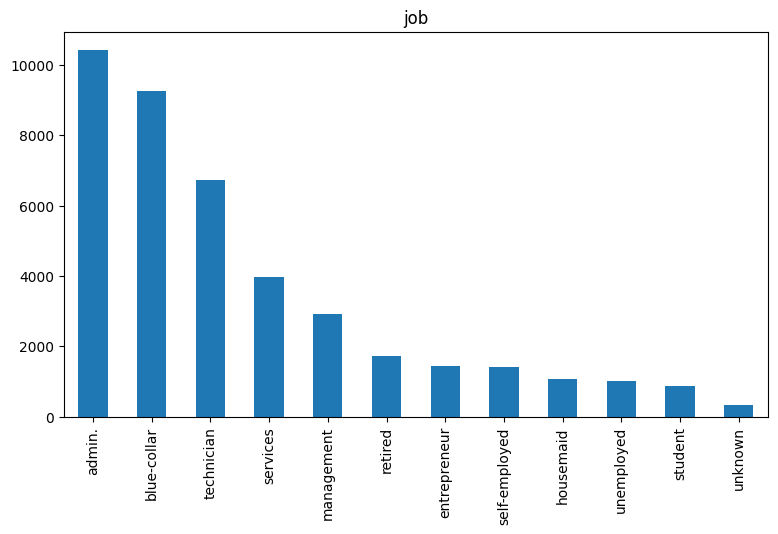

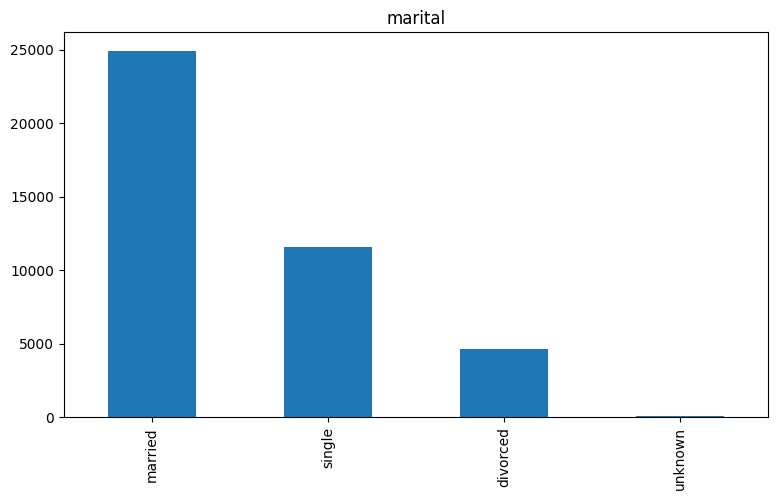

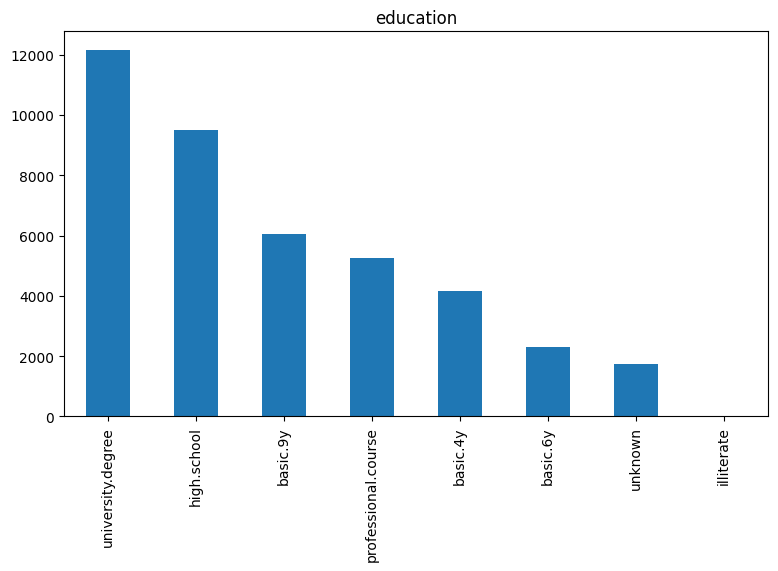

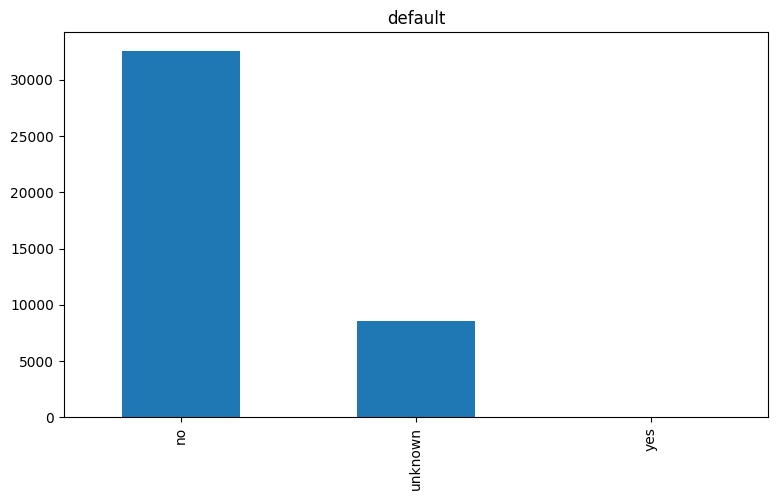

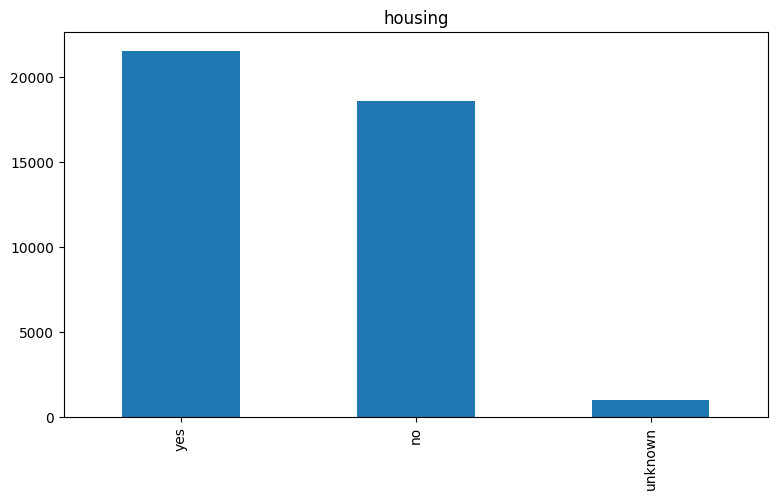

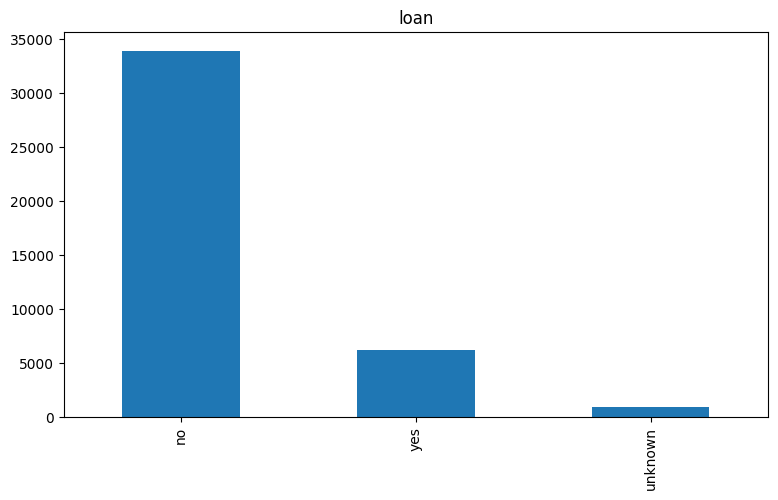

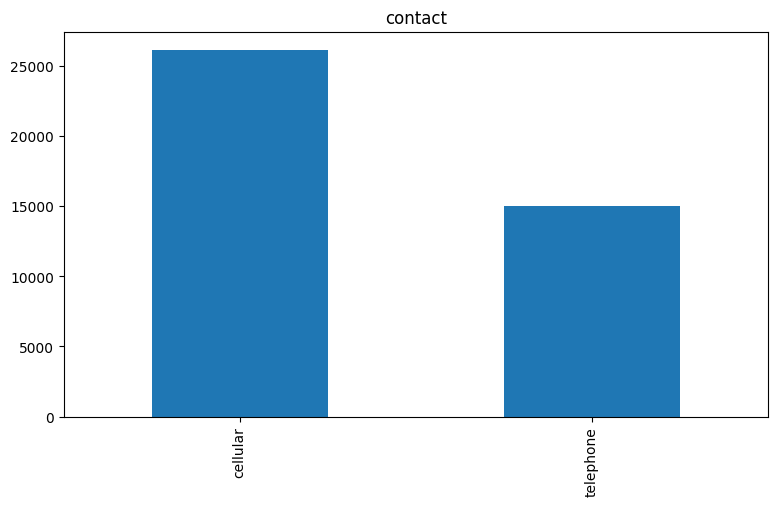

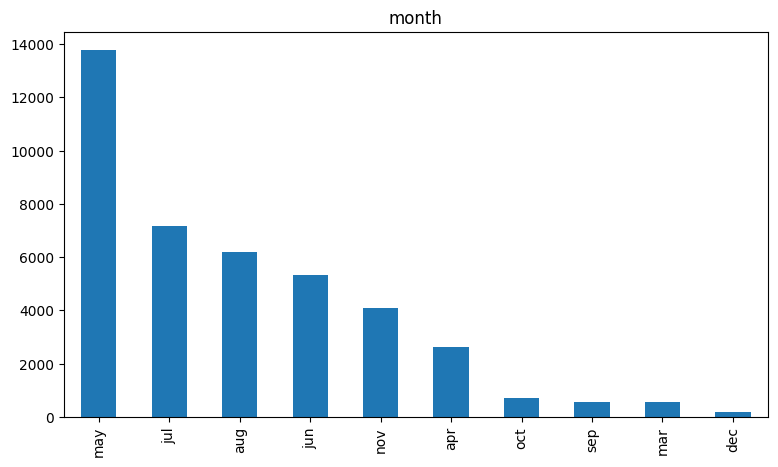

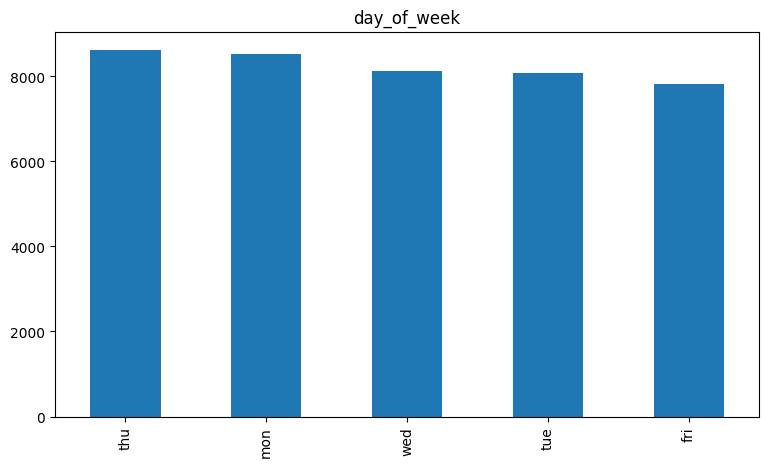

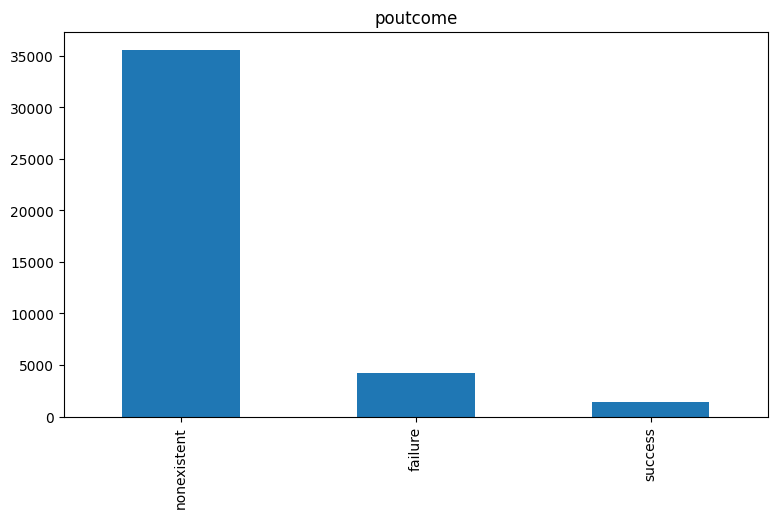

In [ ]:
#categorical feature distribution
#count based on categorical features
for column in categorical_features:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

In [ ]:
# Client with job type as admin are high in given dataset and student are less
# Client having who are married are present more in given dataset and divorced are less
# client who has education background of university degree are more present in the data set
# Default features does not show ratio with respective to its value yes which we can drop
# data is high in month of may and less in december
#loan table also dont play an important role in this dataset

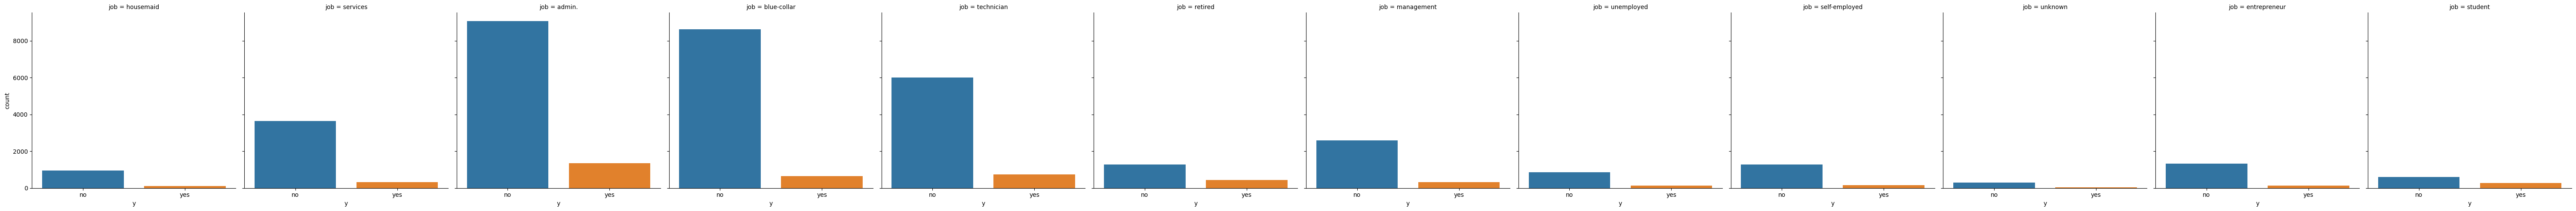

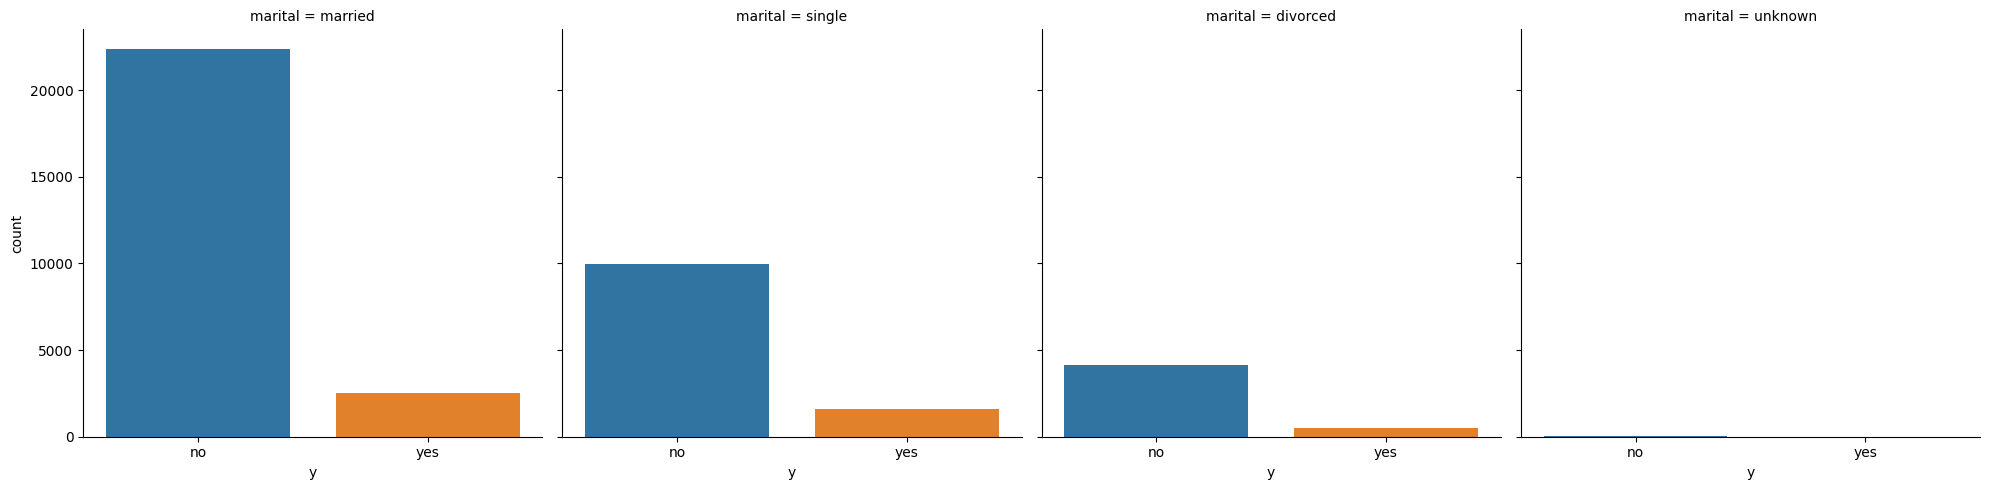

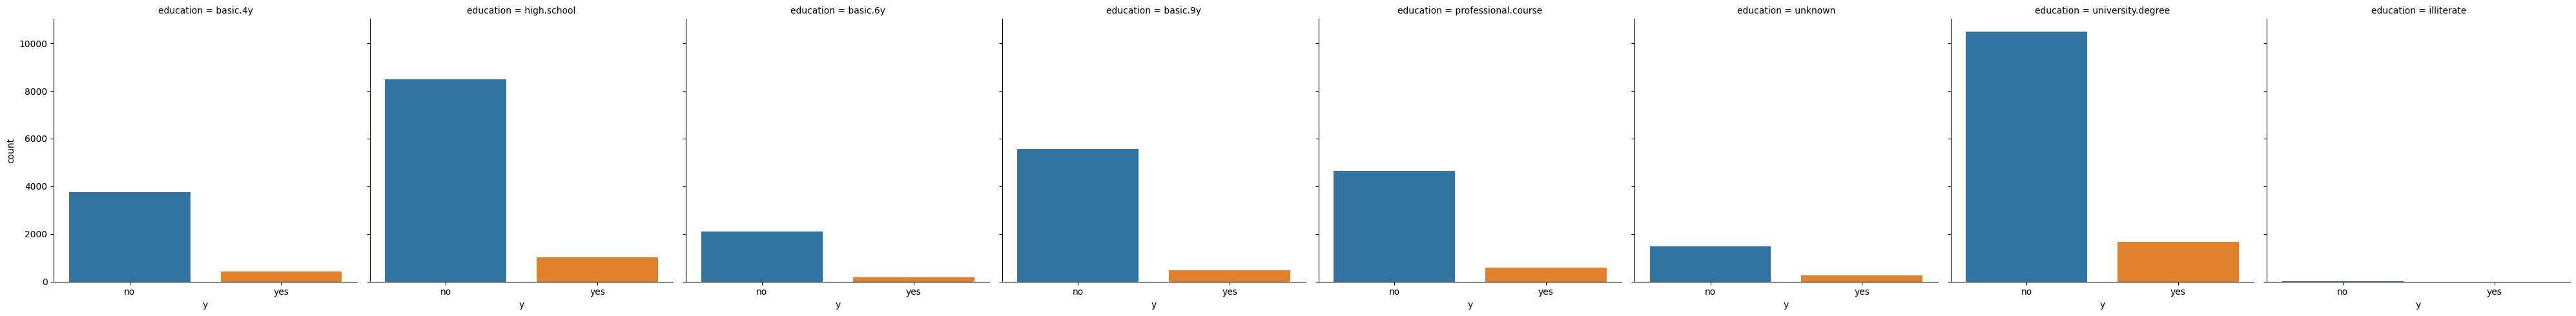

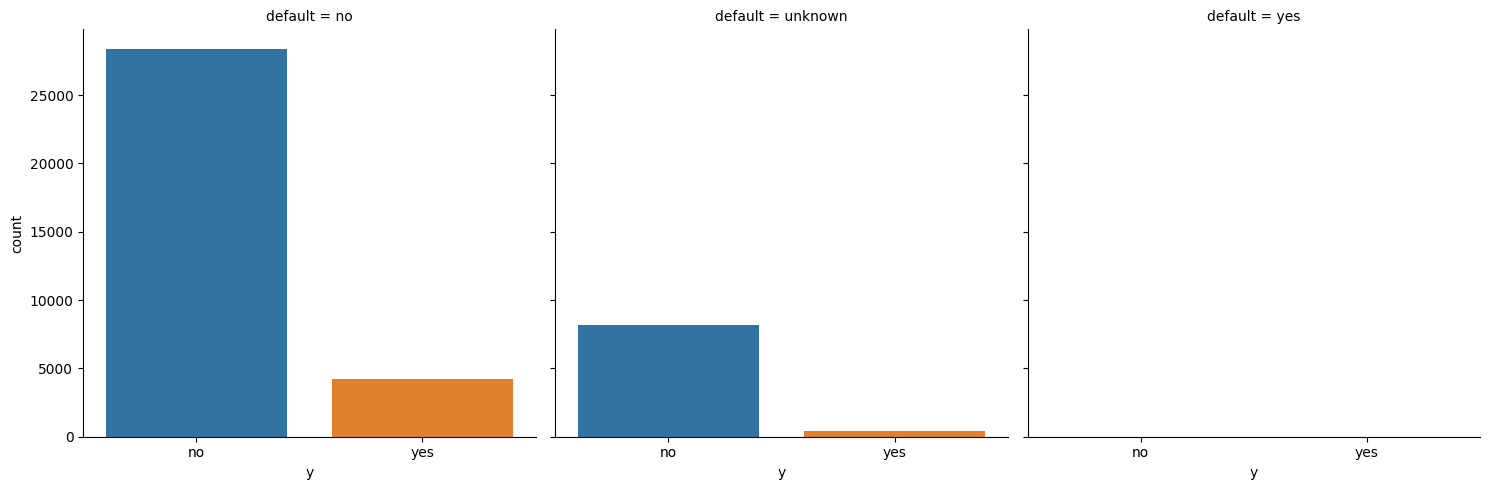

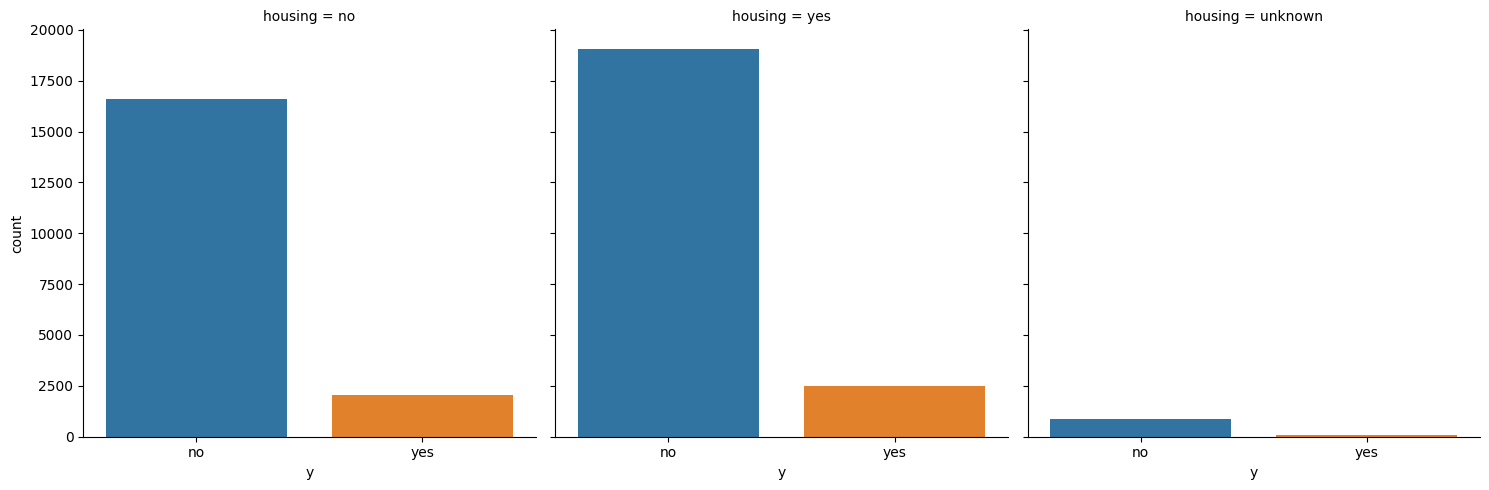

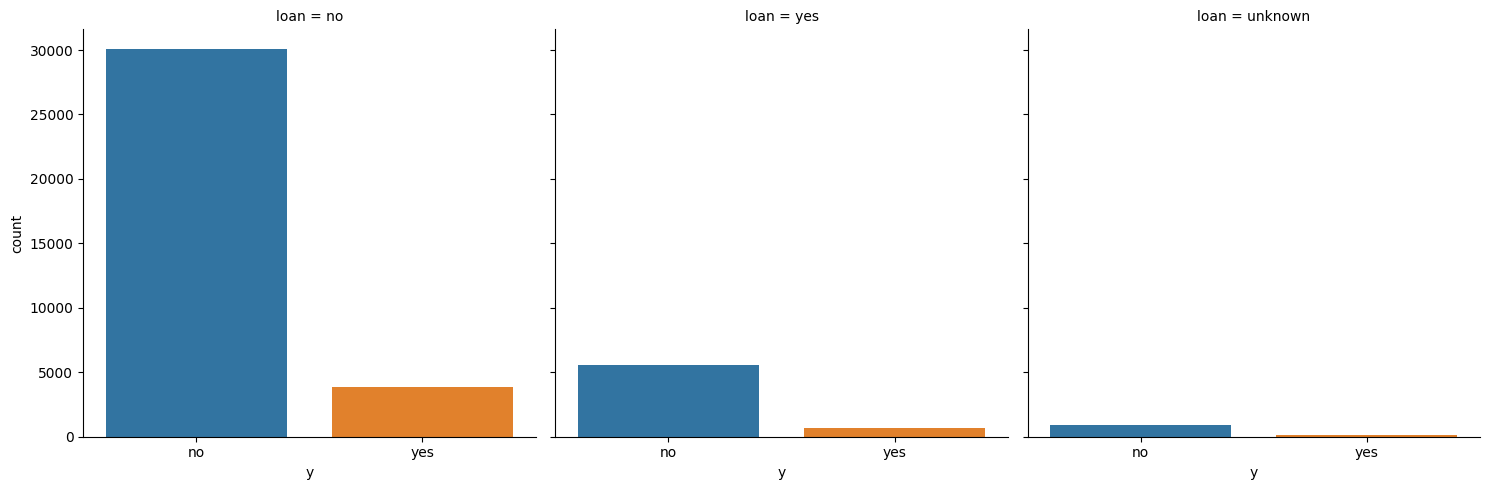

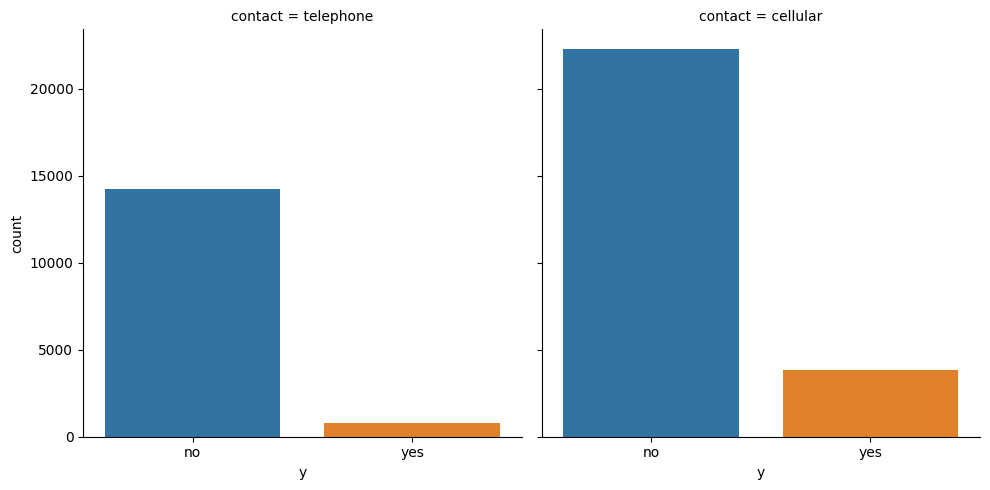

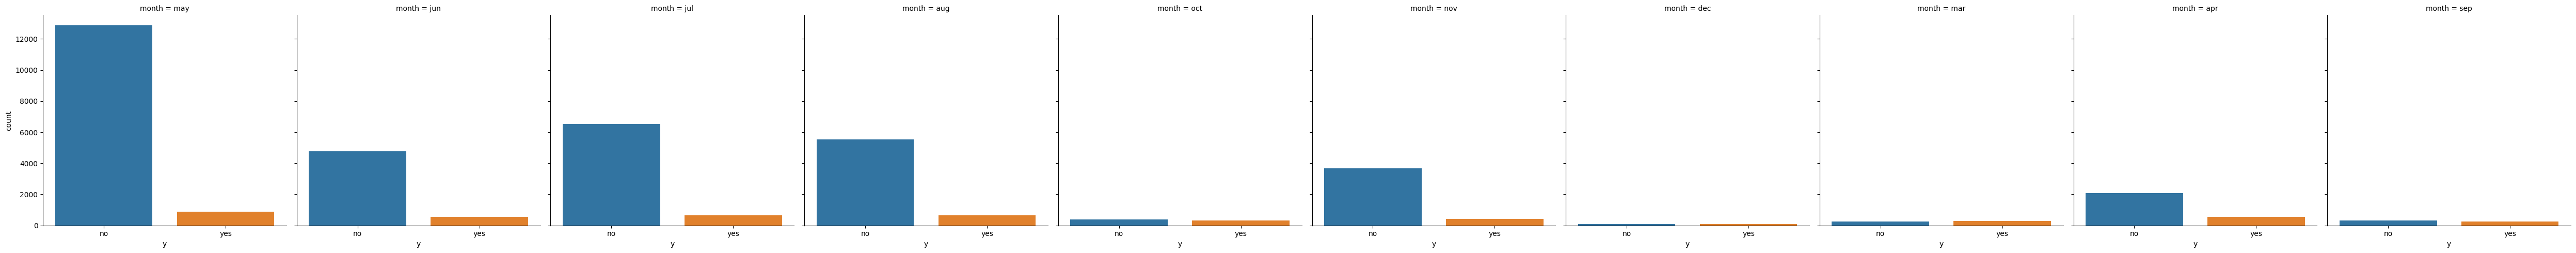

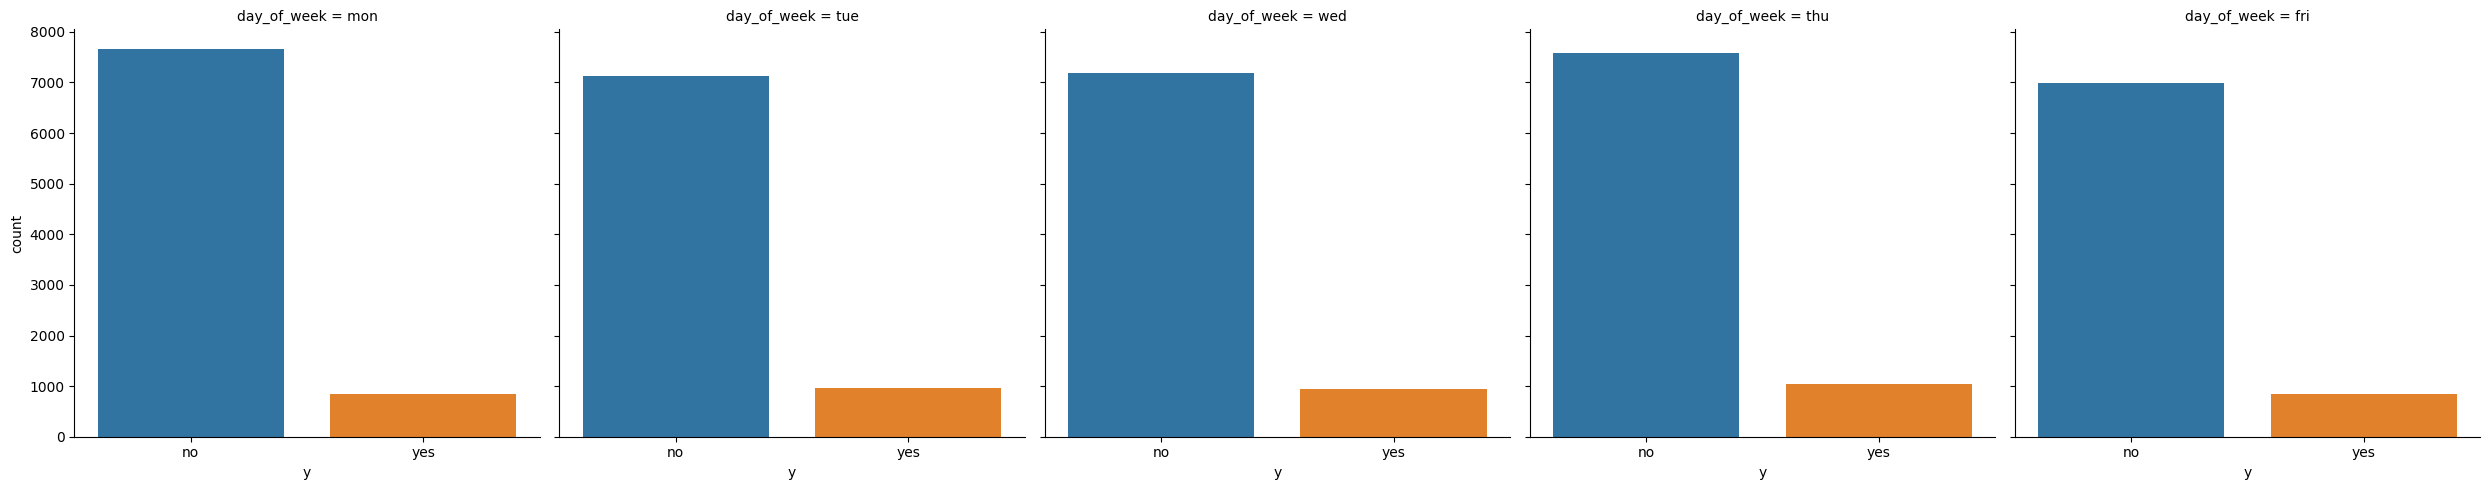

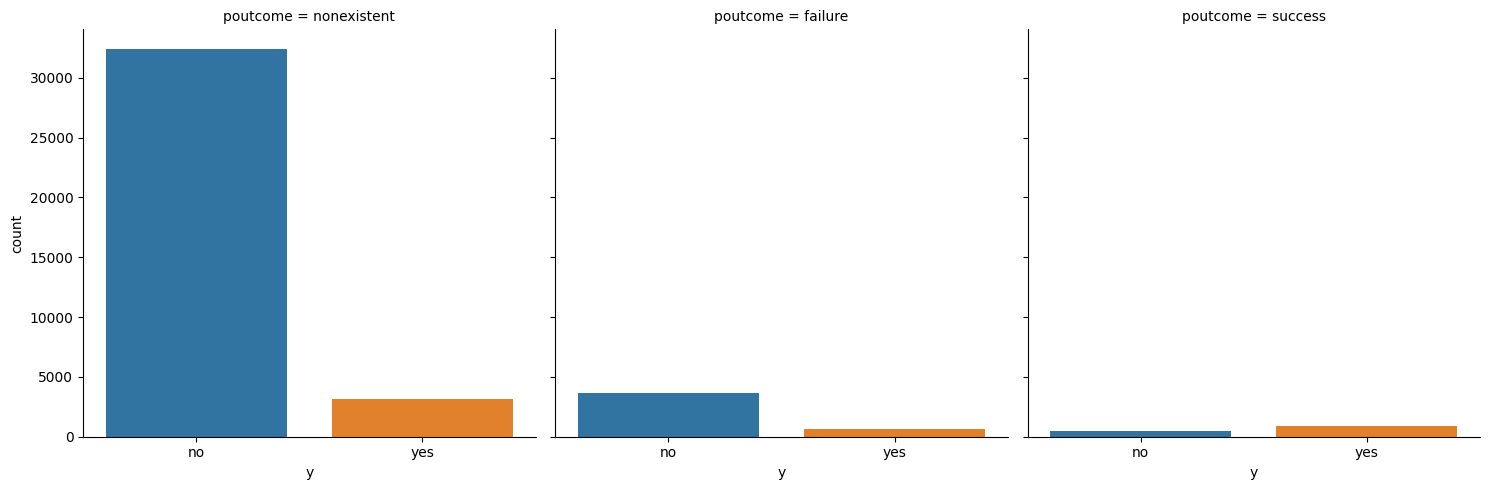

In [ ]:
#find out the relationship between categorical features and dependent variable to get a graph against term deposit to 
#detect features agains clients who have said yes.

for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count',data=data)
plt.show()
    

In [ ]:
for categorical_feature in categorical_features:
    print(data.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

In [ ]:
#client in the month of may have highest intrest to the term deposit and clients in december has the lowest.
#clients on thursday has highest number of intrest to the deposit.
#clients who were contaced on cellphone are more tends towards term deposit.

In [ ]:
numerical_features=[feature for feature in data.columns if ((data[feature].dtype !='O')& (feature not in ['y']))]
print(numerical_features)


['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [ ]:
data[numerical_features].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
#discrete features
discrete_features=[feature for feature in numerical_features if len(data[feature].unique())<25]
print(discrete_features)

['previous', 'emp.var.rate', 'nr.employed']


In [ ]:
#continues features
continues_features=[feature for feature in numerical_features if feature not in discrete_features+['deposit']]
print(continues_features)

['age', 'duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


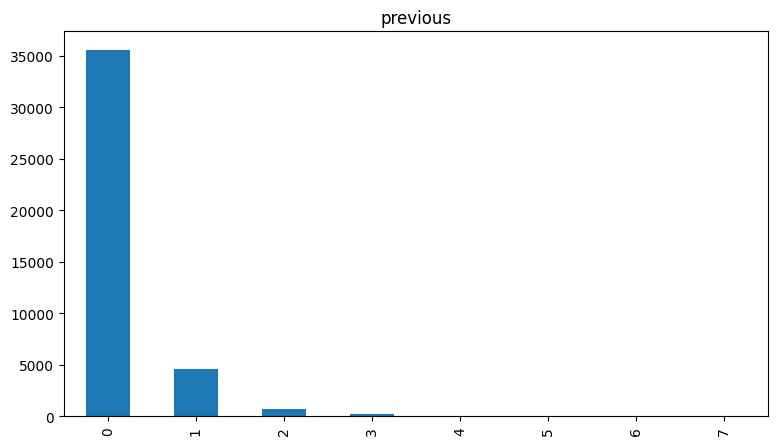

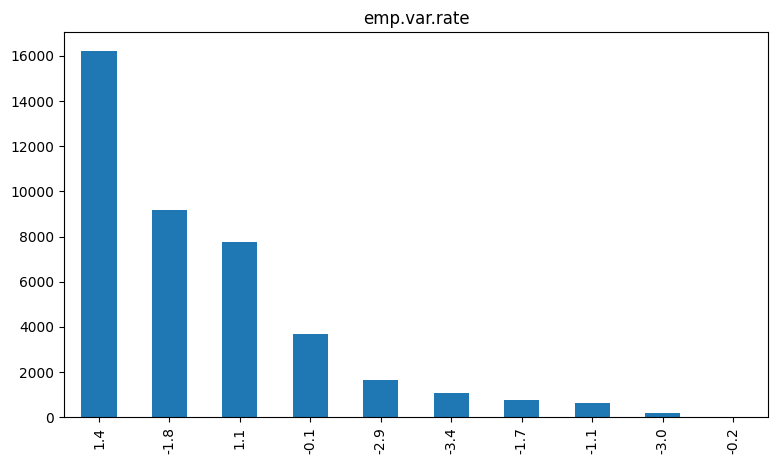

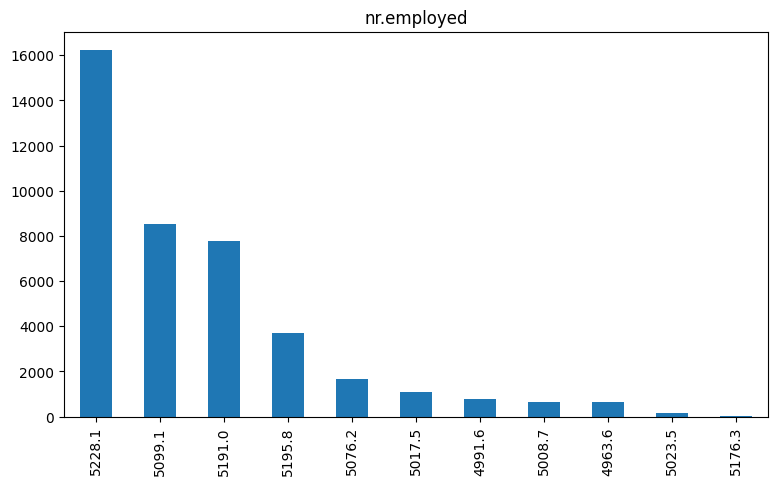

In [ ]:
#distribution of discrete feature
for column in discrete_features:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

In [ ]:
#In order to plot a graph against the term deposit and see how all the features work wrt to it
# one of the odd feature i found out that people having housing loan are more interested in term deposit

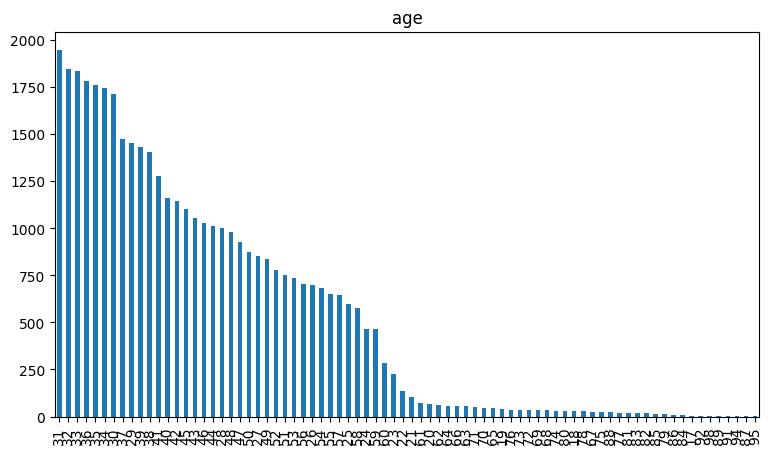

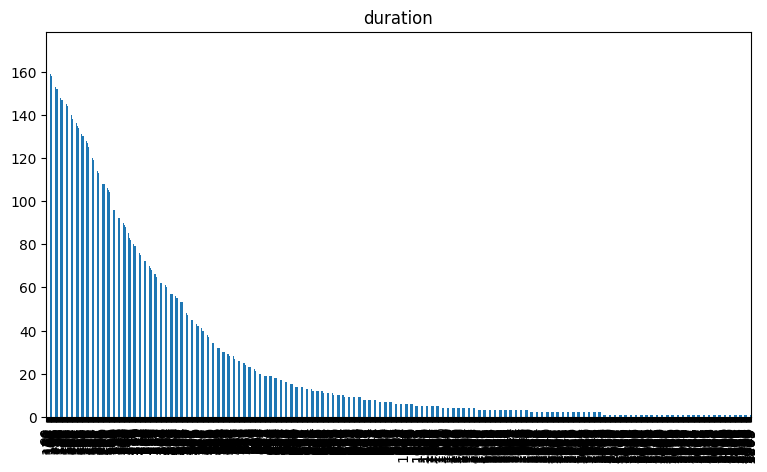

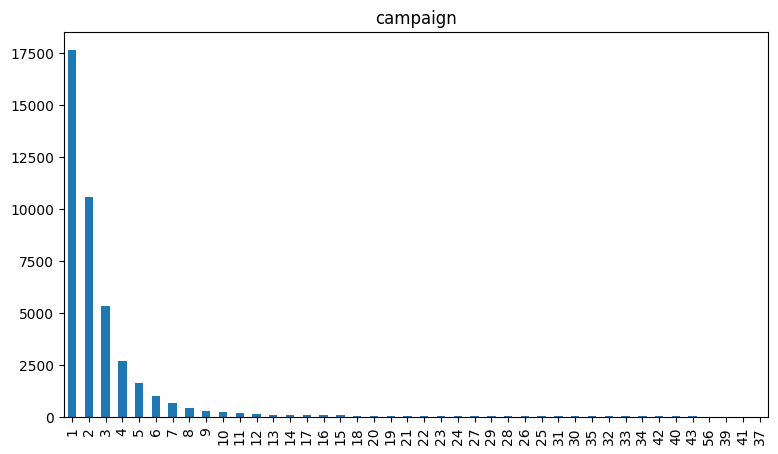

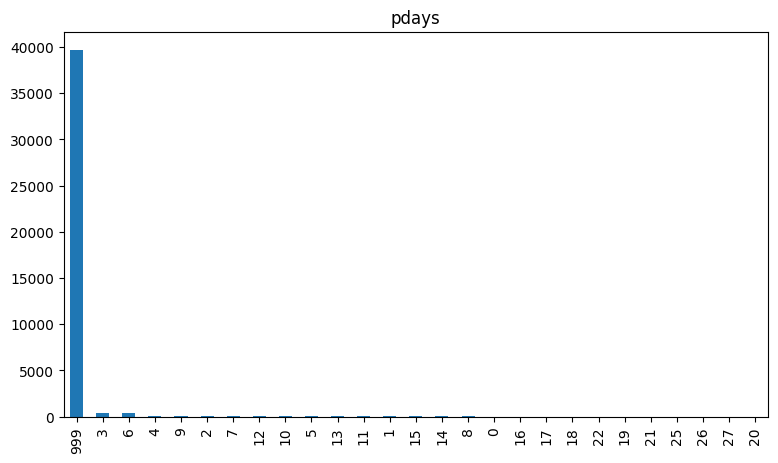

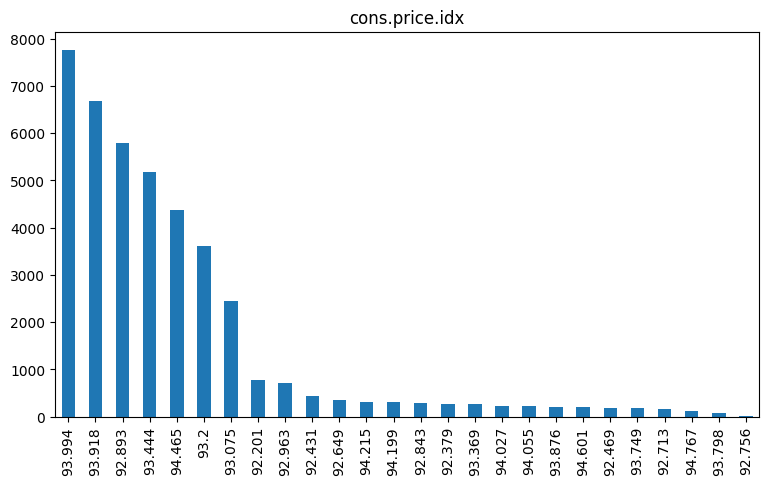

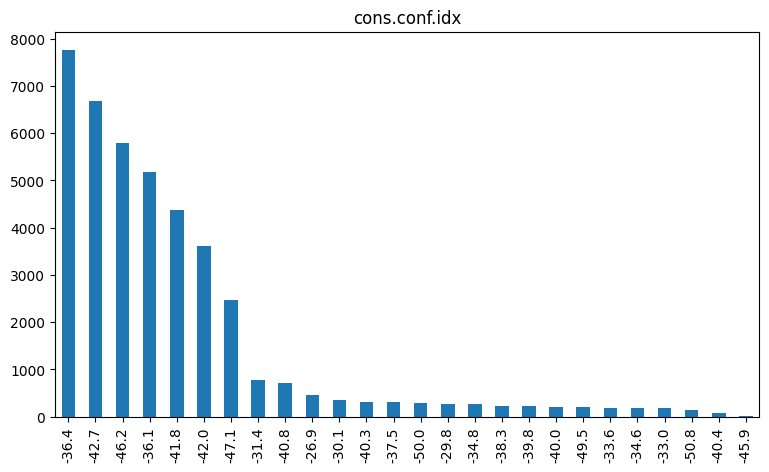

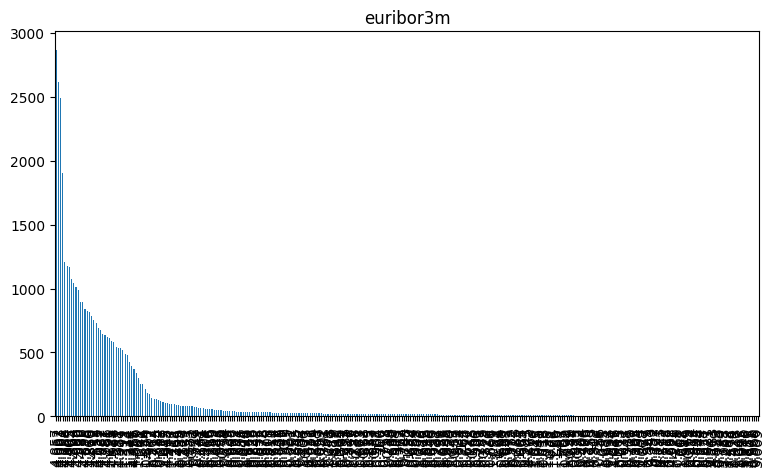

In [ ]:
#distribution of continues featur
for column in continues_features:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

In [ ]:

# Compare to telephone more count of yes is there in data set for cellular feature
# The customer are interested in the month of may and least interested in the month of december.
# On thursday many client said yes to term deposit compare to other days

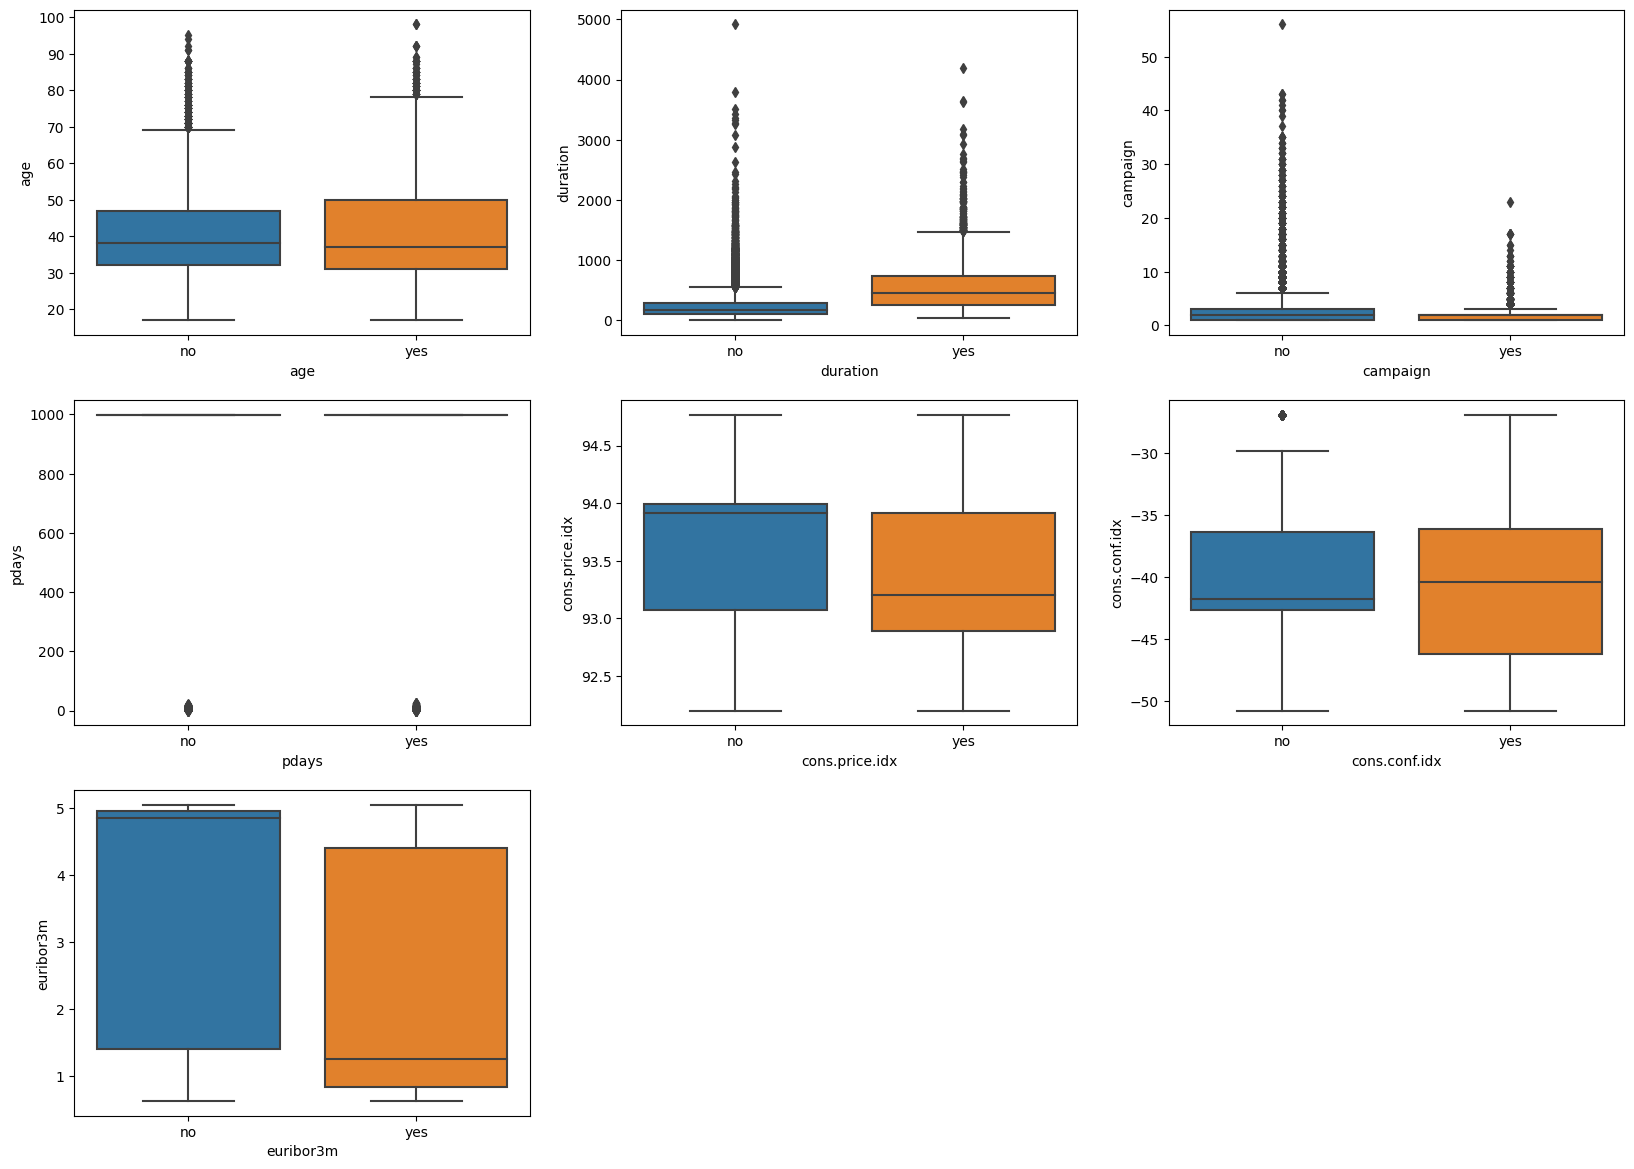

In [ ]:
#relationship between continuous numerical feature and labels
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continues_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y=data[feature], data=data)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [ ]:
#duration,age and campaign have most outliers.
#people around age 35(median value) are more intrested in term deposit.
#client who talks for very few seconds are not intrseted in term deposit.
#clients who has talked more than 10 minutes are more who have taken the term deposit.

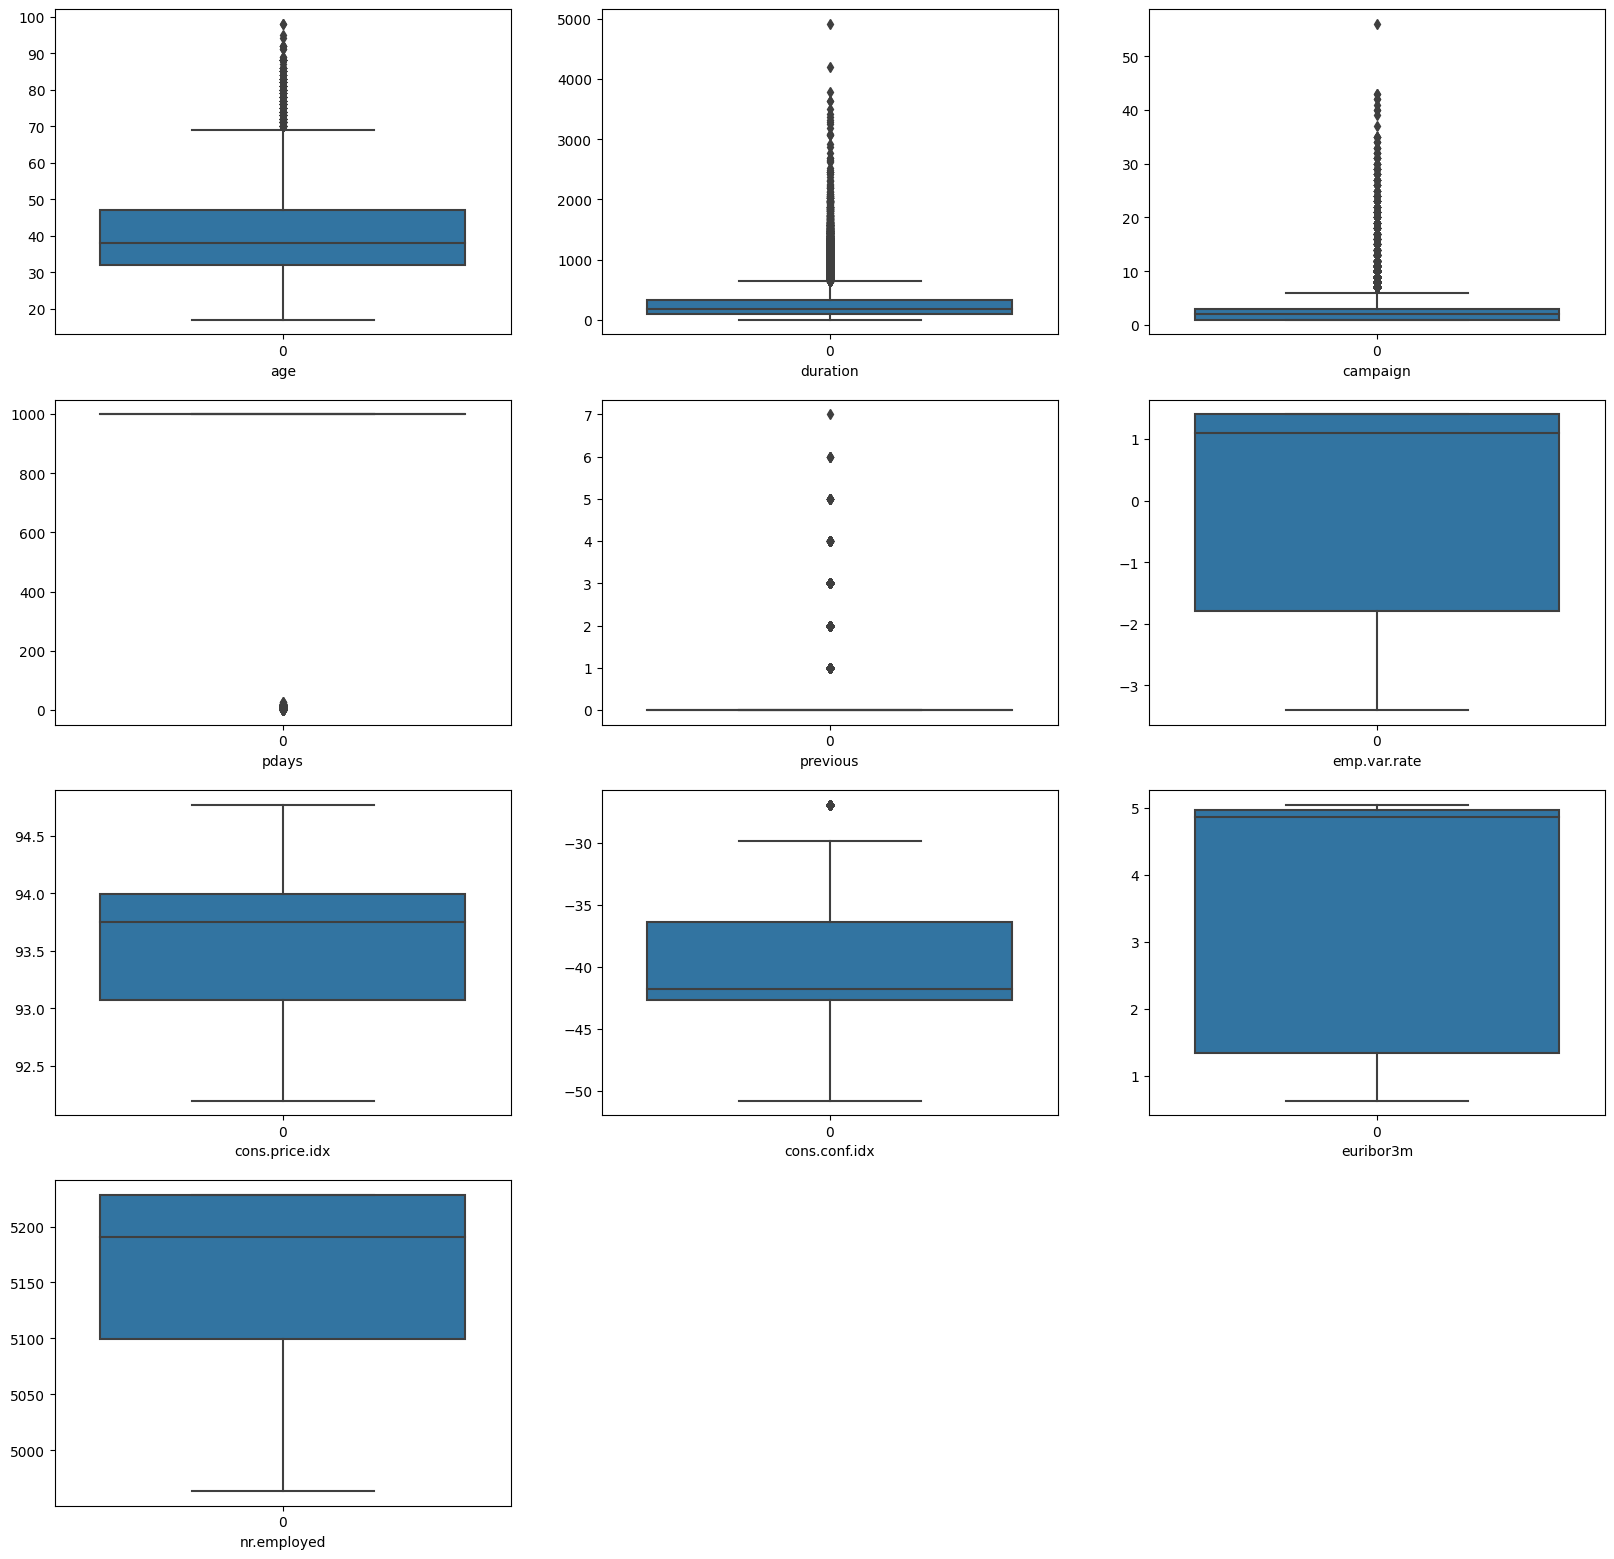

In [ ]:
#for outliers in numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

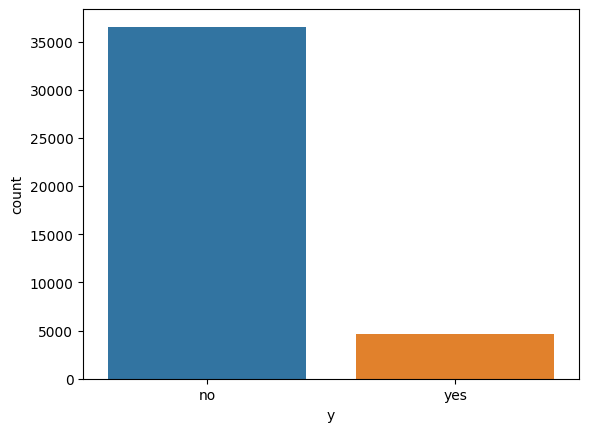

In [ ]:
#check the data set is balanced or not based on target values in classification
sns.countplot(x='y',data=data)
plt.show()

In [ ]:
#88% of clients has not signed the term deposit.
data['y'].groupby(data['y']).count()

y
no     36548
yes     4640
Name: y, dtype: int64

In [ ]:

Conclusion

# one of the feature i found out that people having housing loan are more interested in term deposit
# there are many 78 percent of client to whom bank havent contacted yet from previous campaign
# Approx the call duration 7 to 10 min were agreed to take the loan term deposit 
# We need to work on age ,duration,campaign outlier in feature engineering
# Almost 23000 people are contacted more than once
# 88 percent people had said no to term deposit
#12 percent had  said yes to term deposit


In [ ]:
Feature Engineering 

Drop Unwanted Features
Handle Missing Values
Handle Feature Scaling
Remove Outliers



In [ ]:
As per EDA
- no missing values
- no feature
- 9 categorical values
- Outlier are  age duration campaign

In [1]:
import pandas as pd
df3=pd.read_csv("/content/Bank_Marketing.csv")

In [2]:
df3.groupby(['y','default']).size()

y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
dtype: int64

In [20]:
df3.drop(['default'],axis=1, inplace=True)

In [21]:
df3.groupby(['y','pdays']).size()

KeyError: ignored

In [5]:
#drop pdays as it is not making justification or meaning as per the above document
df3.drop(['pdays'],axis=1, inplace=True)

KeyError: ignored

In [6]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           15342
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
     33              4
     34              3
     35              5
     37              1
     39              1
     40              2
     41              1
     42              2
     43              2
     56              1
yes  1            23

In [22]:
df10= df3[df3['campaign'] < 44]

In [23]:
df10.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           15342
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
     33              4
     34              3
     35              5
     37              1
     39              1
     40              2
     41              1
     42              2
     43              2
yes  1            2300
     2            12

In [12]:
df10.drop(['previous'],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
df10.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,housing_new,loan_new,y_new
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,1,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,1,0


In [24]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome','day_of_week']
for col in  cat_columns:
    df10 = pd.concat([df10.drop(col, axis=1),pd.get_dummies(df10[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [25]:
bool_columns = ['housing','loan', 'y']
for col in  bool_columns:
    df10[col+'_new']=df10[col].apply(lambda x : 1 if x == 'yes' else 0)
    df10.drop(col, axis=1, inplace=True)

In [16]:
df10.head()

,age,default,housing,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,no,no,no,261,1,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,1,0,0,0
1,57,unknown,no,no,149,1,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,1,0,0,0
2,37,no,yes,no,226,1,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,1,0,0,0
3,40,no,no,no,151,1,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,1,0,0,0
4,56,no,no,yes,307,1,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,1,0,0,0


In [27]:
df10.nunique()

age                                78
duration                         1544
campaign                           41
previous                            8
emp.var.rate                       10
cons.price.idx                     26
cons.conf.idx                      26
euribor3m                         316
nr.employed                        11
job_blue-collar                     2
job_entrepreneur                    2
job_housemaid                       2
job_management                      2
job_retired                         2
job_self-employed                   2
job_services                        2
job_student                         2
job_technician                      2
job_unemployed                      2
job_unknown                         2
marital_married                     2
marital_single                      2
marital_unknown                     2
education_basic.6y                  2
education_basic.9y                  2
education_high.school               2
education_il

In [28]:
#Model
# Select Features
feature = df10.drop('y_new', axis=1)

# Select Target
target = df10['y_new']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [29]:
# function to evaluate and calculate accuracy, precision, recall, F1-score and kappa score
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Visualization of Confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [34]:
# Decision Tree Model
import seaborn as sns
import numpy as np
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

Accuracy: 0.8879582422918184
Precision: 0.5140640155189137
Recall: 0.5567226890756303
F1 Score: 0.534543620776601
Cohens Kappa Score: 0.4709725852696701
Area Under Curve: 0.7439803398713316
Confusion Matrix:
 [[6785  501]
 [ 422  530]]


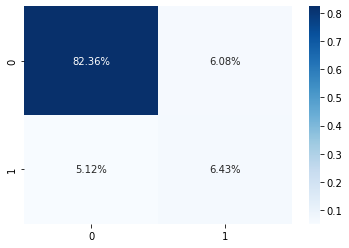

In [35]:
# Evaluate Decision Tree Model
dtc_eval = evaluate_model(dtc, x_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Accuracy: 0.9060451565914057
Precision: 0.6555944055944056
Recall: 0.3939075630252101
F1 Score: 0.4921259842519686
Cohens Kappa Score: 0.4438844322820982
Area Under Curve: 0.9181557470641291
Confusion Matrix:
 [[7089  197]
 [ 577  375]]


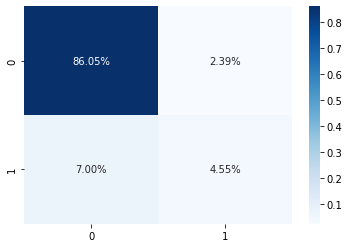

In [37]:
# Evaluate Logistic Regression Model
lr_eval = evaluate_model(logreg, x_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

In [38]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

Accuracy: 0.8703568827385287
Precision: 0.4458955223880597
Recall: 0.5021008403361344
F1 Score: 0.47233201581027673
Cohens Kappa Score: 0.39872821170010253
Area Under Curve: 0.8502840574879416
Confusion Matrix:
 [[6692  594]
 [ 474  478]]


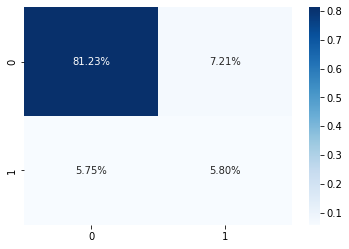

In [39]:
# Evaluate Naive Bayes Model
nb_eval = evaluate_model(nb, x_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

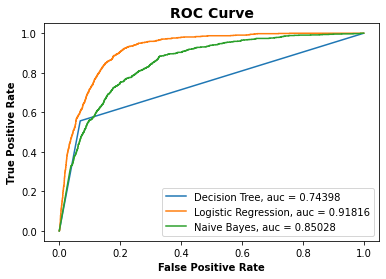

In [41]:
## Comparing ROC Curve
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1)

ax1.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax1.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax1.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))

## Configure x and y axis
ax1.set_xlabel('False Positive Rate', fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax1.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax1.legend(loc=4)

plt.show()

Logistic regression is giving me highest accuracy from the predicted outcome of roc curve.